In [3]:
import sys
!{sys.executable} -m pip install -r requirements.txt

import os
import json
import requests
from requests.auth import HTTPBasicAuth
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from IPython.display import display, Markdown
%matplotlib inline

In [6]:
# Parse environment variables
load_dotenv()

# Set base URL
api = 'https://engrxiv.sfulib4.publicknowledgeproject.org/index.php/engrxiv/api/v1'
url = api + '/submissions'

# Retrieve API Token from environment variable
apiToken = os.environ.get('ENGRXIV_API_TOKEN')

# Retrieve Basic Authentication, also from environment variable
basicAuthUser = os.environ.get('ENGRXIV_API_USER')
basicAuthPass = os.environ.get('ENGRXIV_API_PASS')

# Handle pagination through results
count = 100
offset = 0
itemsStore = []

def paginateRequests(offset):
  # Setup request
  basic = HTTPBasicAuth(basicAuthUser, basicAuthPass)
  params = {'apiToken': apiToken, 'count': count, 'offset': offset}
  response = requests.get(url, auth=basic, params=params)
  print('Offset: ' + str(offset))

  # Convert response string to JSON
  dataJson = json.loads(response.text)
  # Grab the retrieved `items`
  dataList = dataJson['items']
  # Determine how many preprint submissions there are
  totalItems = dataJson['itemsMax']
  # Save items to memory
  itemsStore.extend(dataList)
  # Determine how many preprint submissions we have so far
  numberStored = len(itemsStore)
  print(numberStored)

  if numberStored < totalItems:
    print('Running another pagination request')
    paginateRequests(numberStored)
  else:
    print('Finished!')
    itemsStore

# Kick-off requests
paginateRequests(0)

Offset: 0
100
Running another pagination request
Offset: 100
200
Running another pagination request
Offset: 200
300
Running another pagination request
Offset: 300
400
Running another pagination request
Offset: 400
500
Running another pagination request
Offset: 500
600
Running another pagination request
Offset: 600
700
Running another pagination request
Offset: 700
800
Running another pagination request
Offset: 800
900
Running another pagination request
Offset: 900
1000
Running another pagination request
Offset: 1000
1100
Running another pagination request
Offset: 1100
1200
Running another pagination request
Offset: 1200
1300
Running another pagination request
Offset: 1300
1400
Running another pagination request
Offset: 1400
1500
Running another pagination request
Offset: 1500
1600
Running another pagination request
Offset: 1600
1700
Running another pagination request
Offset: 1700
1800
Running another pagination request
Offset: 1800
1900
Running another pagination request
Offset: 1900
2

In [7]:
data = pd.DataFrame(itemsStore)

data.set_index('id',inplace=True)
count = range(1,len(data) + 1)
data['count'] = count
countsum = count[-1]
today = date.today()
display(Markdown('# As of ' + today.strftime("%B %d, %Y") + ' there are <span style=\"color:red\">'+ str(countsum) + '</span> preprints on Engineering Archive.'))

# As of September 26, 2022 there are <span style="color:red">2150</span> preprints on Engineering Archive.

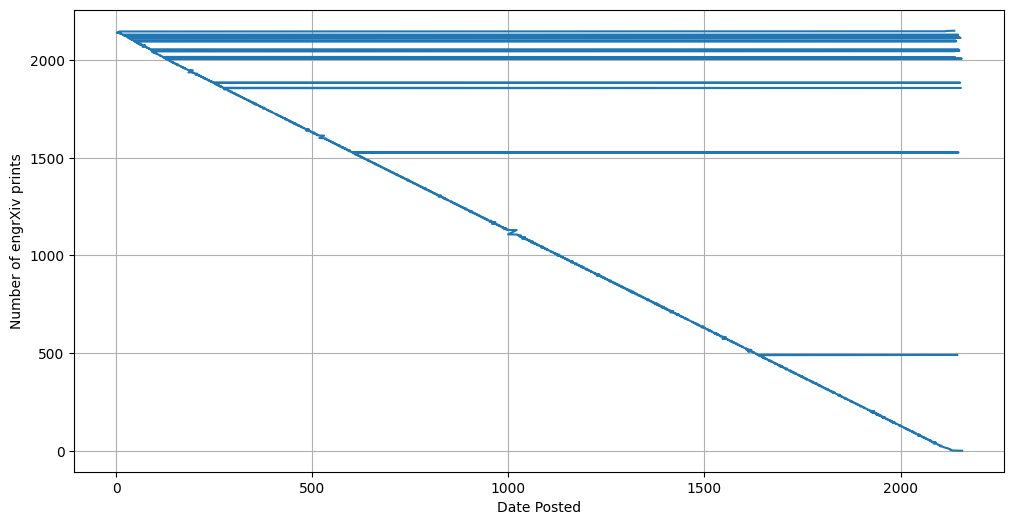

In [8]:
outplot = data.plot(y='count', legend=False, grid='True', figsize=(12,6));
outplot.set_xlabel("Date Posted");
outplot.set_ylabel("Number of engrXiv prints");

In [9]:
outplot2 = data.resample('M').count().plot(y='count', legend=False, grid='True', figsize=(12,6));
outplot2.set_xlabel("Date Posted");
outplot2.set_ylabel("Number of engrXiv prints posted per month");

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
outplot3 = data.resample('Y', kind='period').count().plot.bar(y='count', legend=False, rot=0, grid='True', figsize=(12,6));
outplot3.set_xlabel("Date Posted");
outplot3.set_ylabel("Number of engrXiv prints posted per year");
outplot3.grid(axis='x');

In [ ]:
%%html
<style>
div.input {
    display:none;
}
</style>